In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
data_dir = './DataStreamFeatures/DataFrames/'

df_best_features_15sec = pd.read_csv(data_dir + 'BestMusicFeatures_15seconds.csv')

df_best_features_30sec = pd.read_csv(data_dir + 'BestMusicFeatures_30seconds.csv')

df_best_features_15sec.head()

,Range,PitchVariety,NumberOfCommonPitches,NoteDensity,AmountOfArpeggiation,IntervalBetweenStrongestPitches,MostCommonPitchClassPrevalence,MostCommonPitchPrevalence,RelativeStrengthOfTopPitchClasses,RepeatedNotes,MelodicOctaves,SizeOfMelodicArcs,VariabilityOfNoteDuration,MelodicTritones,PitchClassVariety,Composer_name,Composer_label
0,24.0,18.0,3.0,7.238095,0.562500,7.0,0.315789,0.263158,0.777778,0.348214,0.008929,6.216216,0.089537,0.000000,11.0,Bach,0.0
1,22.0,15.0,4.0,5.269841,0.304878,1.0,0.204819,0.144578,0.882353,0.024390,0.048780,8.261905,0.070927,0.012195,8.0,Bach,0.0
2,31.0,21.0,2.0,6.730159,0.432692,7.0,0.264151,0.188679,0.535714,0.096154,0.009615,7.583333,0.091070,0.000000,12.0,Bach,0.0
3,24.0,17.0,2.0,7.365079,0.508772,7.0,0.336207,0.301724,0.717949,0.412281,0.008772,5.437500,0.083497,0.000000,10.0,Bach,0.0
4,24.0,18.0,3.0,7.047619,0.513761,7.0,0.315315,0.252252,0.657143,0.284404,0.009174,6.944444,0.089949,0.000000,11.0,Bach,0.0


In [3]:
column_names_15 = list(df_best_features_15sec.columns)

column_names_15.pop(column_names_15.index('Composer_name'))
column_names_15.pop(column_names_15.index('Composer_label'))

'Composer_label'

In [4]:
column_names_30 = list(df_best_features_30sec.columns)

column_names_30.pop(column_names_30.index('Composer_name'))
column_names_30.pop(column_names_30.index('Composer_label'))

'Composer_label'

In [5]:
# add back the one hot encodings 

# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_best_features_15sec['Composer_name'])
# Drop column B as it is now encoded
#df = df.drop('Composer_name',axis = 1)
# Join the encoded df
df_best_features_15sec= df_best_features_15sec.join(one_hot)

In [6]:
# add back the one hot encodings 

# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_best_features_30sec['Composer_name'])
# Drop column B as it is now encoded
#df = df.drop('Composer_name',axis = 1)
# Join the encoded df
df_best_features_30sec= df_best_features_30sec.join(one_hot)

In [7]:
# compute average across all rows , should be avg correlation strength 

# filter to keep list of strongest correlations, take cutoff of 0.1

Composers = ['Bach','Beethoven','Brahms','Schubert']

strengths = df_best_features_15sec.corr(method='pearson',numeric_only=True)[Composers].loc[column_names_15].abs().mean(axis=1)

strengths.sort_values(inplace=True,ascending=False)

strengths_15 = strengths

strengths_15

Range                                0.371365
PitchVariety                         0.296356
NumberOfCommonPitches                0.268820
NoteDensity                          0.169233
AmountOfArpeggiation                 0.163811
IntervalBetweenStrongestPitches      0.152007
MostCommonPitchClassPrevalence       0.149842
MostCommonPitchPrevalence            0.139028
RelativeStrengthOfTopPitchClasses    0.137828
RepeatedNotes                        0.129596
MelodicOctaves                       0.125563
SizeOfMelodicArcs                    0.120872
VariabilityOfNoteDuration            0.117620
MelodicTritones                      0.110038
PitchClassVariety                    0.107445
dtype: float64

In [8]:
# compute average across all rows , should be avg correlation strength 

# filter to keep list of strongest correlations, take cutoff of 0.1

Composers = ['Bach','Beethoven','Brahms','Schubert']


#will use column_names_15 here, exlcuding the few extra columns in column names_30
strengths = df_best_features_30sec.corr(method='pearson',numeric_only=True)[Composers].loc[column_names_15].abs().mean(axis=1)

strengths.sort_values(inplace=True,ascending=False)

strengths_30 = strengths

strengths_30

Range                                0.392042
PitchVariety                         0.328815
NumberOfCommonPitches                0.298886
IntervalBetweenStrongestPitches      0.179191
MostCommonPitchPrevalence            0.166521
NoteDensity                          0.161096
AmountOfArpeggiation                 0.152562
MostCommonPitchClassPrevalence       0.125879
RepeatedNotes                        0.121423
SizeOfMelodicArcs                    0.121031
VariabilityOfNoteDuration            0.118402
MelodicOctaves                       0.116749
PitchClassVariety                    0.116427
MelodicTritones                      0.109726
RelativeStrengthOfTopPitchClasses    0.109625
dtype: float64

In [21]:
comparison_df= pd.concat([strengths_15, strengths_30], axis=1)

comparison_df = comparison_df.rename(columns={0: '15 seconds ', 1: '30 seconds'})

comparison_df

,15 seconds,30 seconds
Range,0.371365,0.392042
PitchVariety,0.296356,0.328815
NumberOfCommonPitches,0.268820,0.298886
NoteDensity,0.169233,0.161096
AmountOfArpeggiation,0.163811,0.152562
IntervalBetweenStrongestPitches,0.152007,0.179191
MostCommonPitchClassPrevalence,0.149842,0.125879
MostCommonPitchPrevalence,0.139028,0.166521
RelativeStrengthOfTopPitchClasses,0.137828,0.109625
RepeatedNotes,0.129596,0.121423


<AxesSubplot: >

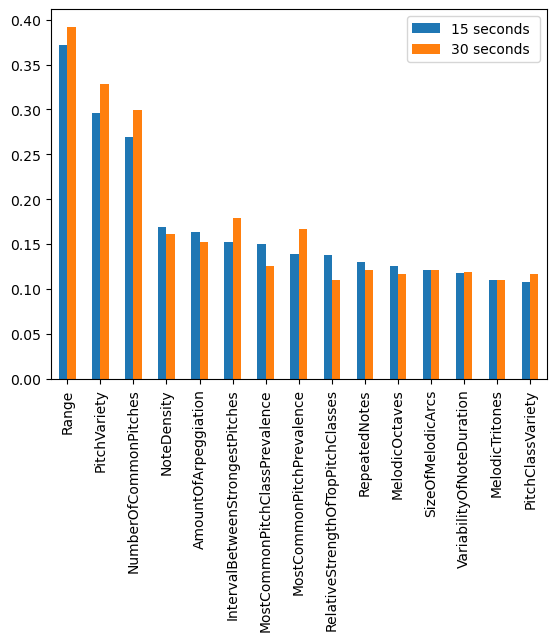

In [22]:
# Bar plot correlation of each feature with composer label for 15 vs 30 seconds data sets 

comparison_df.plot.bar()

15


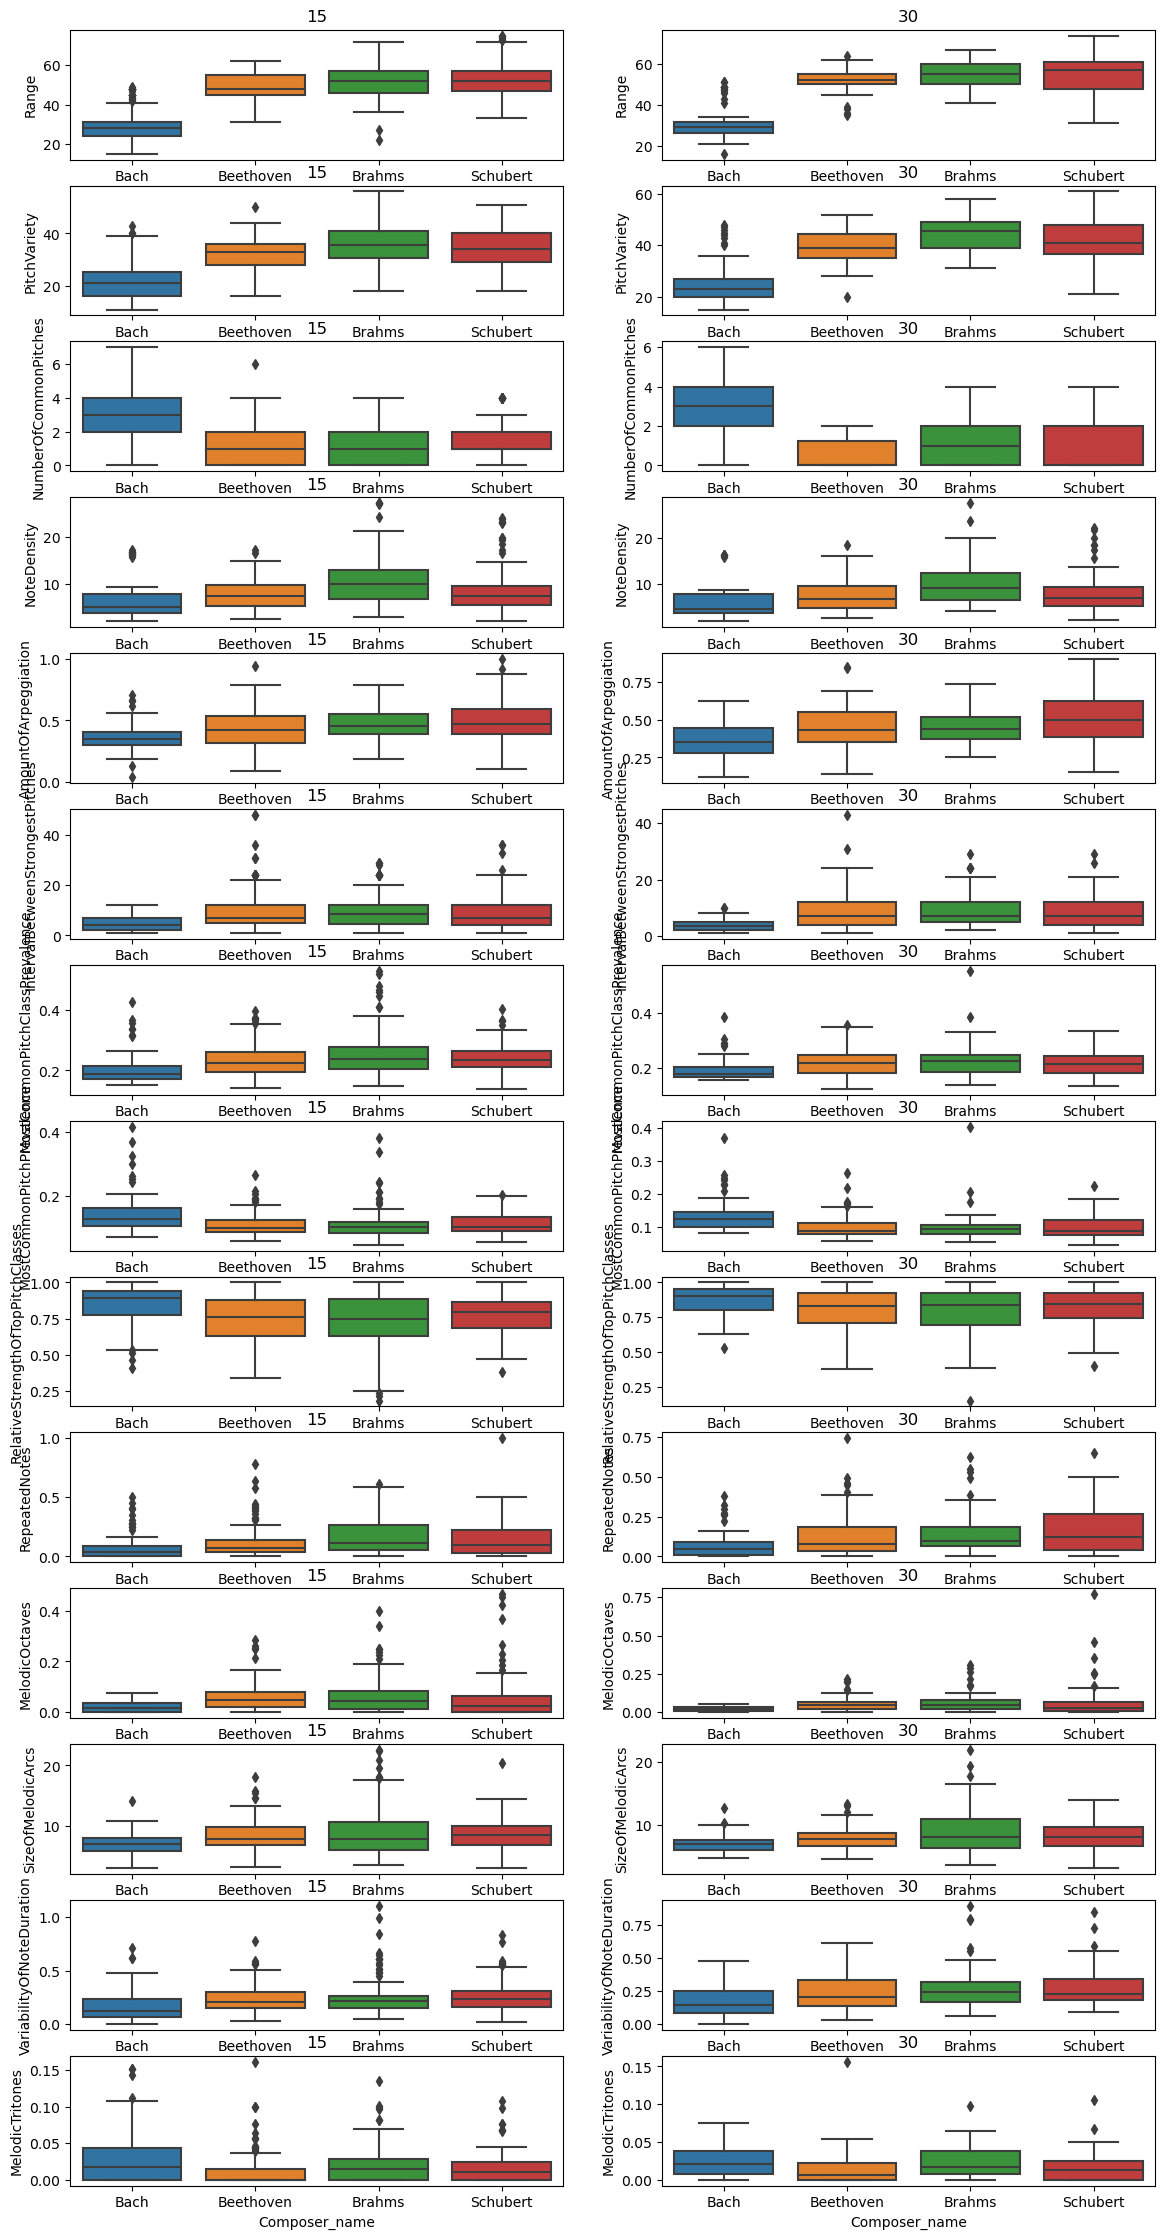

In [42]:
best_features_names = list(strengths_15[strengths_15>0.1].index)

print(len(best_features_names))

category = 'Composer_name'

rows = 14
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(14, 28))

count = 0
for i in range(rows):
    for j in range(cols):
        
        if j==0 and count<len(best_features_names):
            sns.boxplot(x=df_best_features_15sec[category], y=df_best_features_15sec[best_features_names[count]], ax=axs[i, j]).set_title('15')
            
            
        if j==1 and count<len(best_features_names):
            sns.boxplot(x=df_best_features_30sec[category], y=df_best_features_30sec[best_features_names[count]], ax=axs[i, j]).set_title('30')
            
            
    count+=1
        
        

In [36]:
for j in range(2):
    print(j)

0
1
